__Ejercicio 1__: ¿Como podemos evaluar funciones en matrices? Hint: ¿que operaciones sabemos que estan bien definidas sobre matrices?

Siendo $F(x)$ una función y la queremos evaluar en $A$ tomaremos su expansión en serie de Taylor: $$F(A)= \sum_{n=0}^{\infty} \frac{F^{(n)}(0)}{n!}A^{n}$$
Donde tenemos que: $e^{A} =  \sum_{n=0}^{\infty} \frac{A^{n}}{n!}$

__Ejercicio 2__: ¿Como se define una matriz simétrica?

Una matriz A es simétrica si los elementos cumple que $a_{ij}=a_{ji}$, la cual tiene la característica de ser igual a su traspuesta ($A^T=A$).

__Ejercicio 3__: ¿Como puede construir una matriz simétrica a partir de cualquier matriz cuadrada?
Una matriz $A_{nxn}$ se dice que es simetrizable si existe una matriz diagonal invertible $D$ y matriz simétrica $S$ de tal manera que $A = DS$. La transposición de una matriz simétrica es simétrica, ya que $A^T = (DS)^T = SD = D^{-1} ( DSD )$ y $DSD$ es simétrica.
De igual forma utilizando la forma normal de Jordan , se puede probar que cada matriz real cuadrada se puede escribir como un producto de dos matrices simétricas reales, de bido a que las matrices cuadrdas tienen la propiedad de que toda matriz cuadrada se puede descomponer en la suma de una matriz simétrica y una matriz antisimétrica.

__Ejercicio 4__: Construya el propagador $e^{A t}$ para cada tiempo sobre una malla y uselo para propagar un estado inicial $\vec x_0$ cualquiera. Utilice: 

$$A=\left(\begin{array}{cc} -1  & 1\\ -1  & -1 \end{array} \right)$$

Grafique la trayectoria en el espacio de fase.

In [1]:
using PyPlot

In [2]:
A=[-1 1; -1 -1] #Definimos la matriz A

2×2 Array{Int64,2}:
 -1   1
 -1  -1

In [3]:
#calculamos los eigen-valores de A
ev=eigvals(A) 

2-element Array{Complex{Float64},1}:
 -1.0+1.0im
 -1.0-1.0im

In [5]:
d=diagm(ev)

2×2 Array{Complex{Float64},2}:
 -1.0+1.0im   0.0+0.0im
  0.0+0.0im  -1.0-1.0im

In [6]:
#ahora calculamos los eigenvectores
V=eigvecs(A) 

2×2 Array{Complex{Float64},2}:
 0.707107+0.0im       0.707107-0.0im     
      0.0+0.707107im       0.0-0.707107im

In [7]:
expA=V*diagm(exp.(ev))*V'

2×2 Array{Complex{Float64},2}:
 0.198766+0.0im   0.30956+0.0im
 -0.30956+0.0im  0.198766+0.0im

In [8]:
#ahora comprobamos la exp. de la matriz usando la funcion 'por default' de Juilia
expm(A)

2×2 Array{Float64,2}:
  0.198766  0.30956 
 -0.30956   0.198766

In [9]:
#definimos la exponencial en terminos de senos y cosenos...
xpA(t) = e^(-t)*[cos(t) sin(t);-sin(t) cos(t)] 

xpA (generic function with 1 method)

Donde $e^{\boldsymbol{A}t}=\boldsymbol{{w}}e^{\boldsymbol{{D}}t}\boldsymbol{{w}}^{-1}$ es el propagador, que es un operador diagonalizable $\boldsymbol{{D}}$ se tiene que $e^{\boldsymbol{{D}}t}$ es la matriz diagonal cuyas entradas son la exponencial de las entradas de $\boldsymbol{{D}}$.

$e^{\boldsymbol{\mathcal{A}}t}=\frac{e^{-t}}{2}\left(\begin{array}{cc}1 & 1\\i & -i\end{array}\right)\left(\begin{array}{cc}\cos(t)+i\:\mathrm{sen}(t) & 0\\0 & \cos(t)-i\:\mathrm{sen}(t)\end{array}\right)\left(\begin{array}{cc}1 & -i\\1 & i\end{array}\right)=\frac{e^{-t}}{2}\left(\begin{array}{cc}1 & 1\\i & -i\end{array}\right)\left(\begin{array}{cc}\cos(t)+i\:\mathrm{sen}(t) & \mathrm{sen}(t)-i\cos(t)\\\cos(t)-i\:\mathrm{sen}(t) & \mathrm{sen}(t)+i\cos(t)\end{array}\right)$
Por tanto,

$$e^{\boldsymbol{\mathcal{A}}t}=e^{-t}\left(\begin{array}{cc}\cos(t) & \mathrm{sen}(t)\\-\mathrm{sen}(t) & \cos(t)\end{array}\right)$$

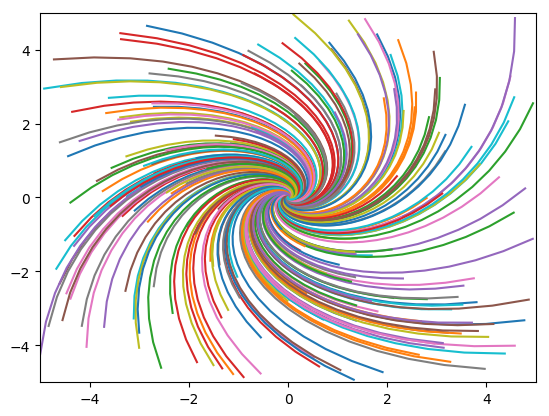

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


In [10]:

listt=0:0.1:200
for j in 1:200
    a=5*(2*rand(1)-1)
    b=5*(2*rand(1)-1)
    x(t)=xpA(t)*[a,b]
    x1=map(x->x[1],x.(listt))
    x2=map(x->x[2],x.(listt))
    plot(x1,x2)
    xlim(-5,5)
    ylim(-5,5)
    legend()
end